# Distribuição de Bernoulli
É a distribuição discreta de espaço amostral {0, 1}, que tem valor 1 com a probabilidade de sucesso p e valor 0 com a probabilidade de falha q = 1 − p. Exemplo clássico de uma experiência de Bernoulli é uma jogada única de uma moeda. A moeda pode dar "coroa" com probabilidade p e "cara" com probabilidade 1 − p. A experiência é dita justa se p = 0.5.
Algumas aplicações:
- Em medicina, indica os fatores que diferenciam um grupo de indivíduos doentes em relação a indivíduos sãos.
- Em Seguros, permite representar fracções da clientela que sejam sensíveis a determinada política securitária em relação a um dado risco particular.
- Em instituições financeiras, pode representar os grupos de risco para a subscrição de um crédito.
- Em econometria, permite representar uma variável discreta, como por exemplo as intenções de voto em atos eleitorais.

Na distribuição de Bernoulli, a __média__ é a própria probabilidade.

Exemplo: Vamos trabalhar com uma distribuição de Bernoulli, com ```p = 0.6```, e observar a convergência dos resultados conforme o tamanho da amostra é incremementada.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

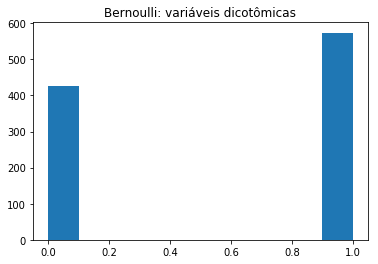

In [3]:
from scipy.stats import bernoulli
bern = bernoulli.rvs(p=0.6, size=1000)

plt.title('Bernoulli: variáveis dicotômicas')
plt.hist(bern);

In [ ]:
bern[:10]

In [6]:
print("Média empírica: ", bern.sum()/len(bern))
print("Variância 1: ",bern.std()**2 )
print("Variância 2: ", bern.std() * bern.std() )

Média empírica:  0.574
Variância:  0.24452399999999996
Desvio padrão:  0.24452399999999996


In [7]:
print('Média Verdadeira: 0.6, Variância Verdadeira: 0.21')
for n in [3,10,100]:
    bern = bernoulli.rvs(p=0.6, size=n)
    print('\namostra:',n)
    print('média:', bern.sum()/len(bern))
    print('var:', bern.std()**2)   

Média Verdadeira: 0.6, Variância Verdadeira: 0.21

amostra: 3
média: 0.6666666666666666
var: 0.2222222222222222

amostra: 10
média: 0.7
var: 0.21000000000000005

amostra: 100
média: 0.55
var: 0.24750000000000005


In [8]:
bern.shape

(100,)

In [9]:
bern.mean()

0.55

In [10]:
rate=0.6
n = np.arange(0,100)
y=bern
y

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

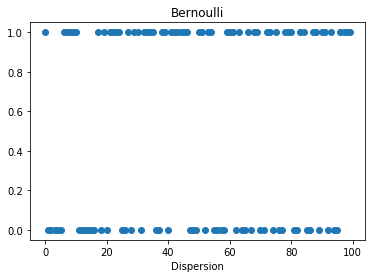

In [11]:
plt.plot(n,y,'o')
plt.title('Bernoulli')
plt.xlabel('Dispersion')
plt.show()

### Calculando a CDF - Cumulative Distribution Function

In [12]:
df_bern = pd.DataFrame(bern,columns=['bernoulli'])
df_bern['CDF'] = df_bern.bernoulli.sort_values(ascending=True).values
df_bern.head()

,bernoulli,CDF
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


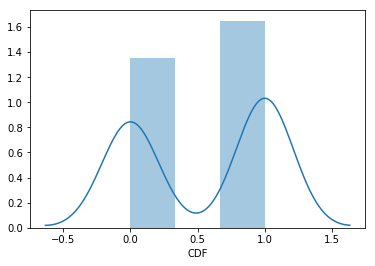

In [13]:
sns.distplot(df_bern['CDF'])

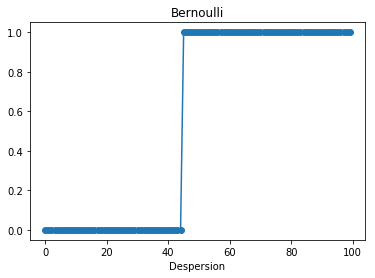

In [14]:
rate=0.6
n = np.arange(0,100)
y=df_bern['CDF']

plt.plot(n,y,'o-')
plt.title('Bernoulli')
plt.xlabel('Despersion')
plt.show()

### Distribuição Binomial
Distribuição de probabilidade discreta do número de sucessos numa sequência de n tentativas tais que:

- Cada tentativa tem exclusivamente como resultado duas possibilidades, sucesso ou fracasso (binomial, a que se chama de tentativa de Bernoulli);
- Cada tentativa é independente das demais;
- A probabilidade de sucesso p a cada tentativa permanece constante independente das demais;
- A variável de interesse, ou pretendida, é o número de sucessos k nas n tentativas.

Vamos simular o lançamento de uma moeda 8 vezes por ensaio, onde a probabilidade de sucesso (obter cara) será 0,5.

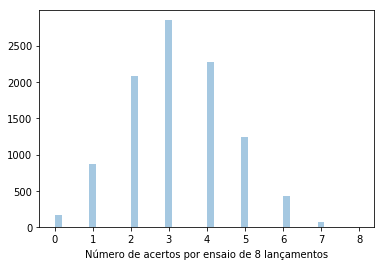

In [15]:
# definimos a quantidade de ensaios.
quantidade_ensaios = 10000

# definimos a quantidade de lançamentos por ensaio.
lançamentos = 8

# definimos a probabilidade de obter cara em cada lançamento.
probabilidade_sucesso = 0.4

# binomial retorna o número de sucessos de cada vez que se realizou um ensaio de 8 lançamentos.
samples_binomial = np.random.binomial(n = lançamentos, p = probabilidade_sucesso, size = quantidade_ensaios)

# construímos um gráfico.
eixo_x = 'Número de acertos por ensaio de 8 lançamentos'
sns.distplot(samples_binomial, axlabel = eixo_x, kde = False);

In [16]:
samples_binomial[:100]

array([3, 3, 4, 5, 3, 2, 5, 5, 2, 2, 3, 2, 6, 3, 3, 0, 1, 4, 6, 3, 6, 2,
       5, 2, 5, 3, 3, 2, 5, 1, 3, 2, 3, 5, 1, 4, 3, 2, 2, 2, 5, 6, 3, 1,
       5, 3, 1, 5, 3, 4, 3, 4, 2, 4, 4, 3, 2, 3, 2, 1, 2, 3, 1, 5, 3, 4,
       6, 4, 1, 2, 5, 1, 3, 5, 2, 2, 3, 2, 4, 4, 3, 1, 3, 5, 4, 2, 4, 4,
       2, 6, 5, 6, 3, 3, 3, 5, 5, 3, 4, 7])

In [17]:
samples_binomial.size

10000

### Densidade de Probabilidade
Qual é a probabilidade de se obter 2 caras de 10 lançamentos de uma moeda?

Neste experimento, a probabilidade de se obter uma cara é de 0,3, o que significa que, em média, podemos esperar que 3 viradas de moeda sejam caras.

mean: 4.0119
SD: 1.55395


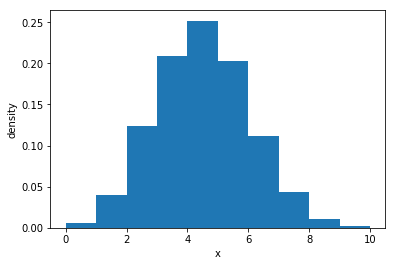

In [18]:
from scipy.stats import binom

binomial_simulation = data = stats.binom.rvs(n=10,p=0.4,size=10000) # Random Variates
print('mean: %g'% np.mean(binomial_simulation))
print('SD: %g' % np.std(binomial_simulation))
plt.hist(binomial_simulation, bins=10, normed=True,histtype='barstacked')
plt.xlabel ('x')
plt.ylabel('density')
plt.show()

In [19]:
n=10
p=0.4
k=np.arange(0,10)
binomial = stats.binom.pmf(k,n,p)  #Função Densidade de Probabilidade
binomial

array([0.00604662, 0.04031078, 0.12093235, 0.21499085, 0.25082266,
       0.20065812, 0.11147674, 0.04246733, 0.01061683, 0.00157286])

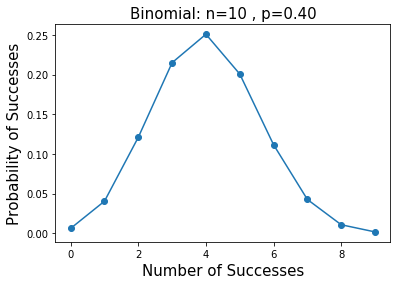

In [20]:
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' %(n,p),fontsize=15)
plt.xlabel('Number of Successes',fontsize=15)
plt.ylabel('Probability of Successes',fontsize=15)
plt.show()